In [1]:
# CBR Flexible pavement design and report

# Imports
import os
import pandas as pd
import numpy as np
import math
import six
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
### General functions

## Read .txt lines
def read_lines(fname):#, encoding = 'utf-8'):
	with open(fname) as f:
		return f.read().splitlines()
    
## CBR Graph Fit Function
def func(x, a, b, c, d, e):
    return a*x**-1.5 + b*x**-0.5 +c*x**(-d) + e

## CBR Method Define what line our traffic belong to
def curve(E):
    if E <= 15:
        return "A"
    elif E <= 45:
        return "B"
    elif E <= 150:
        return "C"
    elif E <= 450:
        return "D"
    elif E <= 1500:
        return "E"
    elif E <= 4500:
        return "F"
    elif E > 4500:
        return "G"
    else:
        print("something went wrong")
        
# CBR Method Retorun line fited for cbr method
# TODO

In [4]:
# Traffic Gathering Data from data files
# Folder CBR_inputs
'''
Read me

Traffic data by vehicle type is given in "Traffic_data.xlsx" /ws/ "Vehicle daily traffic"
traffic growth parameters "TrafficDesignParameters.txt"

must implement code for curve G

'''

input_folder = "CBR_inputs"
## get traffic tab for vehicles distribution
traffic_data_file = "Traffic_data.xlsx"
traffic_tab = pd.read_excel(os.path.join(input_folder, traffic_data_file), sheetname  = "Vehicle daily traffic")

## get traffic growth parameters (.txt)
traffic_param_file = "TrafficDesignParameters.txt"
traffic_param_arr = read_lines(os.path.join(input_folder, traffic_param_file))
cars_growth_rate = int(traffic_param_arr[0].split("\t")[1])/100
trucks_growth_rate = int(traffic_param_arr[1].split("\t")[1])/100
tr_lane_distribution = int(traffic_param_arr[2].split("\t")[1])/100
design_life = int(traffic_param_arr[3].split("\t")[1])

cars_growth_factor = round((((1+ cars_growth_rate)**design_life-1)/cars_growth_rate),2)
trucks_growth_factor = round((((1+ trucks_growth_rate)**design_life-1)/trucks_growth_rate),2)

## FWHA_ESAL Values.txt (ESAL Values For each Vehicle Type given:)
## Need axes for each vehicle type to recalculate and prove ESAL Values
fwha_esal_file = "FWHA_ESAL Values.txt"
fwha_esal = read_lines(os.path.join(input_folder, fwha_esal_file))

## Calculate E.S.A.L. columns and other columns
# Current daily traffic as readed from txt
traffic_tab["Current Daily traffic"] = traffic_tab["Current Daily traffic"].astype(int)
# Growth Factor (Right side is to create series to append to table (table column are FIXED))
traffic_tab['Growth Factor'] = pd.Series([cars_growth_factor] * 3 + [trucks_growth_factor] * 10, index=traffic_tab.index)
# ESAL Factor (as readed from respective txt)
traffic_tab["ESAL Factor"] = pd.Series(fwha_esal , index=traffic_tab.index)
# ESAL Convert to numeric
traffic_tab["ESAL Factor"] = traffic_tab["ESAL Factor"].astype(float)
# Must check if it is the same as Accumulated Traffic
traffic_tab["Design Traffic"] = traffic_tab["Current Daily traffic"]*traffic_tab["Growth Factor"]*365
traffic_tab["Design Traffic"] = traffic_tab["Design Traffic"].astype(int)
# Design ESAL # See design traffic comment above
traffic_tab["Design ESAL"] = traffic_tab["Design Traffic"]*traffic_tab["ESAL Factor"]
traffic_tab["Design ESAL"] = traffic_tab["Design ESAL"].astype(int)
design_esal = traffic_tab["Design ESAL"].sum()

## Number of vehicle exceding 3ton "E". Number of commercial vehicles
## Must see difference between Traffic adjustment factor and Growth factor
# Anticipated daily traffic in terms of number of vehicles exceeding 3 tons
# must check how the traffic adjustment factor is determined
# Caluclated E is not cumulative
traffic_adjustment_factor = (1+cars_growth_rate)**(design_life)
E = traffic_tab[traffic_tab["class"] > 2]["Current Daily traffic"].sum()*tr_lane_distribution*traffic_adjustment_factor

# Read CBR Design Values # Values of CBR for each Pave
cbr_file = "CBR Design Values.txt"
cbr = read_lines(os.path.join(input_folder, cbr_file))

# Read CBR - Depth of construction table values
CBR_depth_file = "CBR_Depth of construction values.xlsx"
CBR_depth = pd.read_excel(os.path.join(input_folder, CBR_depth_file), sheetname  = "Depth of construction")

# Read Reliability factors by road Type
Reliability_file = "ZR.txt"
Reliability_factors = read_lines(os.path.join(input_folder, Reliability_file))


#### TODOS
# ESAL AXES Calculation


c:\users\c.r.c\appdata\local\programs\python\python36\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [5]:
# Gett all functions correlations


A_popt, A_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['A'], maxfev=100000)
B_popt, B_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['B'], maxfev=100000)
C_popt, C_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['C'], maxfev=100000)
D_popt, D_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['D'], maxfev=100000)
E_popt, E_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['E'], maxfev=100000)
F_popt, F_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['F'], maxfev=100000)
G_popt, G_pcov = curve_fit(f = func, xdata = CBR_depth['CBR'], ydata = CBR_depth['G'], maxfev=100000)

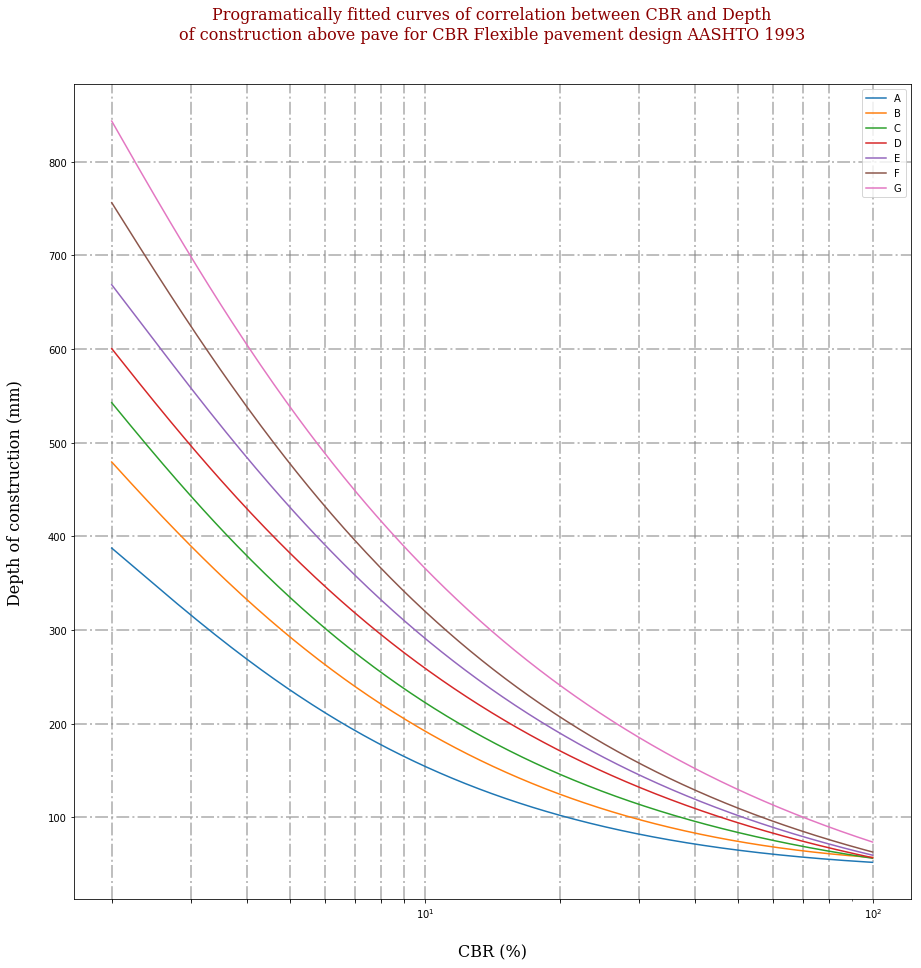

In [5]:
# Plot Fitted Lines
# Visualise the data

#plt.scatter(CBR_depth['CBR'], CBR_depth['F'], color="green")
plt.rcParams['figure.figsize'] = [15, 15]
x_grid = np.arange(2, 100, 0.1)
plt.plot(x_grid, func(x_grid, *A_popt), label="A")
plt.plot(x_grid, func(x_grid, *B_popt), label="B")
plt.plot(x_grid, func(x_grid, *C_popt), label="C")
plt.plot(x_grid, func(x_grid, *D_popt), label="D")
plt.plot(x_grid, func(x_grid, *E_popt), label="E")
plt.plot(x_grid, func(x_grid, *F_popt), label="F")
plt.plot(x_grid, func(x_grid, *G_popt), label="G")
'''
# Non logartimic normal tick define and labels
ax = plt.gca()
x_labels = np.asarray([2,10,20,30,40,50,60,70,80,100])
ax.set_xticks(x_labels)
'''
# Set X axes logaritmic
ax = plt.gca()
x_labels = np.asarray([2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,100])
ax.set_xscale('log')
ax.set_xticks(x_labels)

axix_font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
plt.grid(color='gray', linestyle='-.', linewidth=2, alpha = .5)
plt.ylabel('Depth of construction (mm)\n', fontdict=axix_font)
plt.xlabel('\nCBR (%)', fontdict=axix_font)
title_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Programatically fitted curves of correlation between CBR and Depth\nof construction above pave for CBR Flexible pavement design AASHTO 1993\n\n', fontdict=title_font)
plt.legend()
plt.savefig('correlation between CBR and Depth.png')
plt.show()

In [6]:
# Was before # T0 = T_value(int(cbr[0].split("\t")[1]), curve(E))

# F_popt must be dynamic
T3 = func(int(cbr[3].split("\t")[1]), *F_popt) # thickness of surface # AC layer
T2 = func(int(cbr[2].split("\t")[1]), *F_popt) # thickness of base
T1 = func(int(cbr[1].split("\t")[1]), *F_popt) # thickness of subbase
T0 = func(int(cbr[0].split("\t")[1]), *F_popt) # thickness of modified soil

thickness = [math.ceil(T3/10),math.ceil(T2/10),math.ceil(T1/10),math.ceil(T0/10)]
thickness

[7, 21, 40, 54]

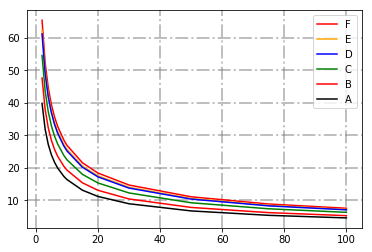

In [110]:
'''
Aproach
Function T_value not correct

This is the correct way if line curve function is determined correctly
'''
# Line for curves is incorrect 
# this way is not to be used

def T_value(CBR, curve):
    if curve == "A":
        return (CBR/1625)**(-0.55)
    elif curve == "B":
        return (CBR/1984)**(-0.56)
    elif curve == "C":
        return (CBR/2879)**(-0.55)
    elif curve == "D":
        return (CBR/3546)**(-0.55)
    elif curve == "E":
        return (CBR/3660)**(-0.55)
    elif curve == "F" or curve == "G":
        return (CBR/3998)**(-0.55)
    else:
        print("something went wrong")
'''
def T_value(CBR, curve):
    if curve == "A":
        return (CBR*1625)**(-1.82)
    elif curve == "B":
        return (CBR*1984)**(-1.73)
    elif curve == "C":
        return (CBR*2874)**(-1.52)
    elif curve == "D":
        return (CBR*3546)**(-1.81)
    elif curve == "E":
        return (CBR*3660)**(-1.76)
    elif curve == "F" or curve == "G":
        return (CBR*3998)**(-1.73)
    else:
        print("something went wrong")
'''
def T_curve(CBR, E):
    vals = []
    for cbr in CBR:
        vals.append(T_value(cbr, curve(E)))
    return vals

import matplotlib.pyplot as plt
X = [2,3,4,5,6,7,9,10,15,20,30,50,75,100]
plt.plot(X, T_curve(X, 4000), color = "red", label='F')
plt.rcParams['figure.figsize'] = [15, 15]
plt.plot(X, T_curve(X, 1000), color = "orange", label='E')
plt.plot(X, T_curve(X, 400), color = "blue", label='D')
plt.plot(X, T_curve(X, 100), color = "green", label='C')
plt.plot(X, T_curve(X, 40), color = "red", label='B')
plt.plot(X, T_curve(X, 10), color = "black", label='A')
plt.grid(color='gray', linestyle='-.', linewidth=2, alpha = .5)
plt.legend()
plt.show()

In [121]:

'''
# Fitting curve F
# No need for feature scaling on polynomial regression ?
F_x = np.asarray([2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50, 60, 70, 80, 100])
F_y = np.asarray([757, 622, 537, 482, 435, 395, 360, 320, 205, 157, 135, 107, 99, 81, 79, 67])
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(F_x.reshape(-1, 1))
from sklearn.linear_model import LinearRegression
poly_reg_lin = LinearRegression()
poly_reg_lin.fit(x_poly, F_y)


# Visual display the linar regression result and polynomial regression result
plt.scatter(F_x, F_y, color="green")
# plt.plot(X, lin_reg.predict(X), color = "red")
# plt.plot(X, lin_reg_2.predict(X), color = "blue") # must pas polynomial terms
# must pass x_poly
# good coding to pass the trasform so it can be able to predict for any given matrix and show matrix
plt.plot(F_x, poly_reg_lin.predict(poly_reg.fit_transform(F_x.reshape(-1, 1))), color = "blue")
plt.title("Linear and polynomial regression comparison")
plt.xlabel("Position label")
plt.ylabel("Salary")
plt.show()
'''

'\n# Fitting curve F\n# No need for feature scaling on polynomial regression ?\nF_x = np.asarray([2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 40, 50, 60, 70, 80, 100])\nF_y = np.asarray([757, 622, 537, 482, 435, 395, 360, 320, 205, 157, 135, 107, 99, 81, 79, 67])\nfrom sklearn.preprocessing import PolynomialFeatures\npoly_reg = PolynomialFeatures(degree = 2)\nx_poly = poly_reg.fit_transform(F_x.reshape(-1, 1))\nfrom sklearn.linear_model import LinearRegression\npoly_reg_lin = LinearRegression()\npoly_reg_lin.fit(x_poly, F_y)\n\n\n# Visual display the linar regression result and polynomial regression result\nplt.scatter(F_x, F_y, color="green")\n# plt.plot(X, lin_reg.predict(X), color = "red")\n# plt.plot(X, lin_reg_2.predict(X), color = "blue") # must pas polynomial terms\n# must pass x_poly\n# good coding to pass the trasform so it can be able to predict for any given matrix and show matrix\nplt.plot(F_x, poly_reg_lin.predict(poly_reg.fit_transform(F_x.reshape(-1, 1))), color = "blue")\nplt.titl

In [124]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K'

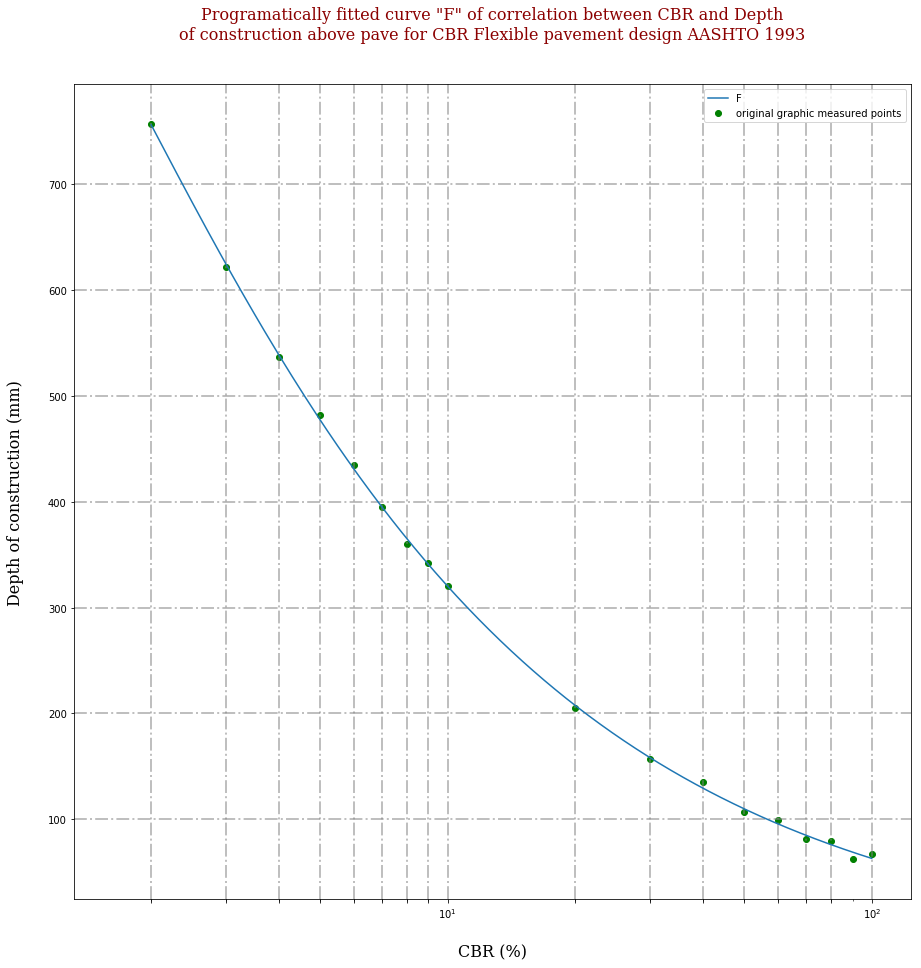

In [14]:
# Best fitting curve method Visualisation (F Curve)
# Visualise the data

#plt.scatter(CBR_depth['CBR'], CBR_depth['F'], color="green")
plt.rcParams['figure.figsize'] = [15, 15]
x_grid = np.arange(2, 100, 0.1)

plt.plot(x_grid, func(x_grid, *F_popt), label="F")
plt.scatter(CBR_depth['CBR'], CBR_depth['F'], label="original graphic measured points", color='g')
'''
# Non logartimic normal tick define and labels
ax = plt.gca()
x_labels = np.asarray([2,10,20,30,40,50,60,70,80,100])
ax.set_xticks(x_labels)
'''
# Set X axes logaritmic
ax = plt.gca()
x_labels = np.asarray([2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,100])
ax.set_xscale('log')
ax.set_xticks(x_labels)

axix_font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
plt.grid(color='gray', linestyle='-.', linewidth=2, alpha = .5)
plt.ylabel('Depth of construction (mm)\n', fontdict=axix_font)
plt.xlabel('\nCBR (%)', fontdict=axix_font)
title_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('Programatically fitted curve "F" of correlation between CBR and Depth\nof construction above pave for CBR Flexible pavement design AASHTO 1993\n\n', fontdict=title_font)
plt.legend()
plt.savefig('correlation between CBR and Depth.png')
plt.show()

c:\users\c.r.c\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


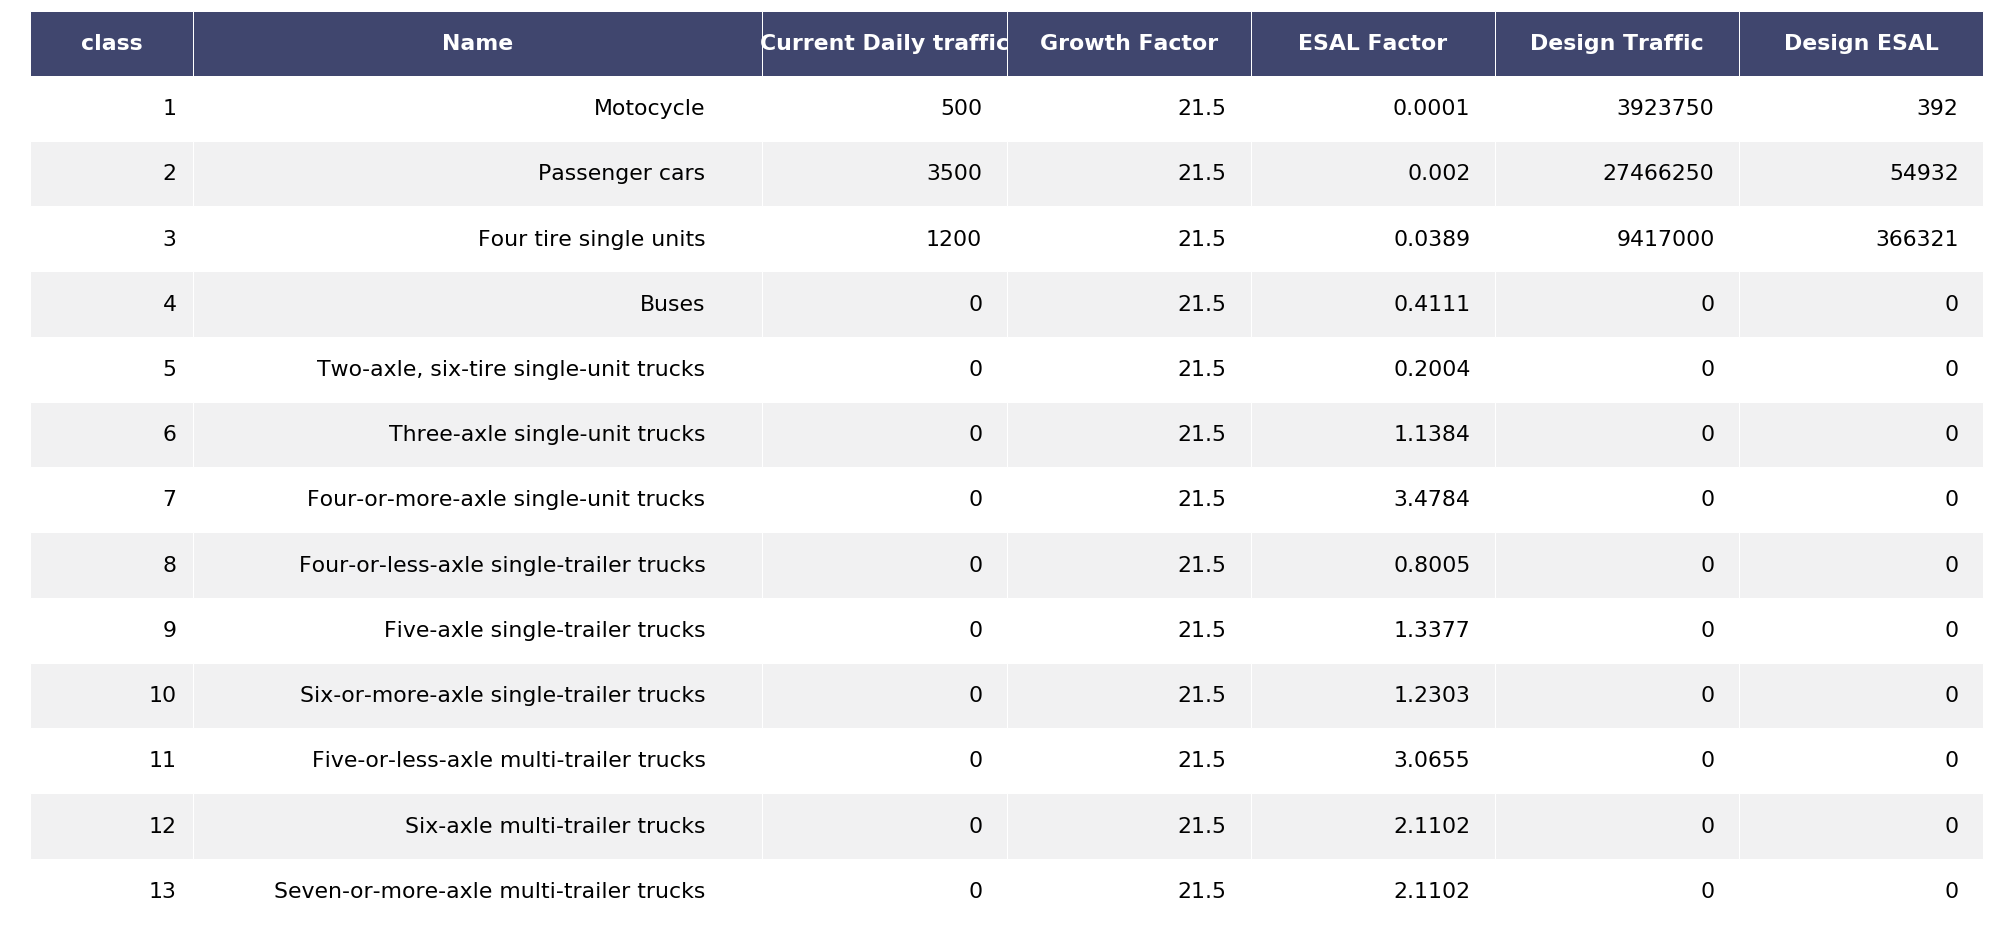

In [7]:
traffic_tab_ = traffic_tab
traffic_tab_[traffic_tab_['class'] == 5]['Name'] = 'Two axle, six-tire single unit trucks'
def render_mpl_table(data, col_width=3.0, row_height=1.2, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, fig_width=3.0, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([fig_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns,colWidths=col_width, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    
    '''
    cell_dict = mpl_table.get_celld()
    for i in range(13):
    cell_dict[(i,1)].set_width(.5)
    '''
    
    
    
    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(traffic_tab, header_columns=0, col_width=[2,7,3,3,3,3,3], fig_width=5, font_size=22)

In [252]:
gone_wrong_functions = """

from pandas.tools.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, traffic_tab)  # where df is your data frame

#plt.savefig('mytable.png')
plt.show()


# method worked but matplotlib works better

css = '''
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}

td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}

th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}

td {
background: #FAFAFA;
text-align: center;
}

table tr:nth-child(odd) td{
background-color: white;
}
</style>
'''


import imgkit
import random
#imgkit.from_url("http://google.com", "out.pdf")
def DataFrame_to_image(data, css, outputfile="out.png", format="png"):
    '''
    For rendering a Pandas DataFrame as an image.
    data: a pandas DataFrame
    css: a string containing rules for styling the output table. This must 
         contain both the opening an closing <style> tags.
    *outputimage: filename for saving of generated image
    *format: output format, as supported by IMGKit. Default is "png"
    '''
    fn = str(random.random()*100000000).split(".")[0] + ".html"
    
    try:
        os.remove(fn)
    except:
        None
    text_file = open(fn, "a")
    
    # write the CSS
    text_file.write(css)
    # write the HTML-ized Pandas DataFrame
    text_file.write(data.to_html())
    text_file.close()
    
    # See IMGKit options for full configuration,
    # e.g. cropping of final image
    # 
    path_wkthmltopdf = r'C:\Program Files (x86)\wkhtmltopdf\bin\wkhtmltoimage.exe'
    config = imgkit.config(wkhtmltoimage=path_wkthmltopdf)
    
    
    
    imgkitoptions = {"format": format}
    
    imgkit.from_file(fn, outputfile, options=imgkitoptions, config = config)# , configuration = config
    os.remove(fn)

DataFrame_to_image(traffic_tab, css, outputfile="traffic_tab.png", format="png")

def temp(CBR,coef,power):
    return (coef*CBR)**(power)


def func(x, a, b, c, d, e):
    return a*x**-1.5 + b*x**-0.5 +c*x**(-d) + e

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f = func, xdata = F_x, ydata = F_y, maxfev=100000)
plt.scatter(F_x, F_y, color="green")
plt.plot(F_x, func(F_x, *popt), label="Fitted Curve") #same as line above \/
plt.show()

"""


In [16]:
traffic_tab

,class,Name,Current Daily traffic,Growth Factor,ESAL Factor,Design Traffic,Design ESAL
0,1,Motocycle,500,21.5,0.0001,3923750,392
1,2,Passenger cars,3500,21.5,0.0020,27466250,54932
2,3,Four tire single units,1200,21.5,0.0389,9417000,366321
3,4,Buses,0,21.5,0.4111,0,0
4,5,"Two-axle, six-tire single-unit trucks",0,21.5,0.2004,0,0
5,6,Three-axle single-unit trucks,0,21.5,1.1384,0,0
6,7,Four-or-more-axle single-unit trucks,0,21.5,3.4784,0,0
7,8,Four-or-less-axle single-trailer trucks,0,21.5,0.8005,0,0
8,9,Five-axle single-trailer trucks,0,21.5,1.3377,0,0
9,10,Six-or-more-axle single-trailer trucks,0,21.5,1.2303,0,0


In [52]:
# Reliability factor


RoadTypes = ['Interstate and other freeways', 'Principal aertials', 'Collectors', 'Local']
RoadAreas = ['Urban', 'Rural']
RoadType = 3
Urban = True
# Get reliability column
if Urban:
    Zr_values = 1
else:
    Zr_values = 2

# Get Reliability line
Reliability = 99.9
for reliability_line in Reliability_factors:
    if reliability_line.split('\t')[0] == RoadTypes[RoadType]:
        #Must add option to choose lower allowed values (values low value is reliability_line.split('\t')[Zr_values].split(' ')[0])
        Reliability = float(reliability_line.split('\t')[Zr_values].split(' ')[1])

In [53]:
# combined standard error

# Must make dynamic
S0 = 0.5

In [56]:
import math
math.log(design_esal, 10)

5.624946954692092

In [50]:
# Serviceable life

math.log(design_esal)

from scipy import stats
Zr = -1*stats.t.ppf((Reliability/100),999)

P0 = 4.2
Pt = 1.5
d_PSI = P0-Pt
Mr = 11000 # Psi #
def sn_eval(thicknesses, laer_coef, drainage, coeff)

-1.2823995700373974

In [51]:
Zr*S0

-0.6411997850186987

In [42]:
log(P)

Help on t_gen in module scipy.stats._continuous_distns object:

class t_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A Student's T continuous random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `t` is:
 |  
 |  .. math::
 |  
 |      f(x, df) = \frac{\gamma((df+1)/2)}
 |                      {\sqrt{\pi*df} \gamma(df/2) (1+x^2/df)^{(df+1)/2}}
 |  
 |  for ``df > 0``.
 |  
 |  `t` takes ``df`` as a shape parameter.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      t_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_continuous:
 |  
 |  __init__(self, momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |      Initialize self.  See help(type(self)) for accurate sig

In [48]:
(1-(Reliability/100))*2

0.19999999999999996

0.0

In [ ]:
Canlculative_Notes = '''
Zr = =-1*TINV((1-(Reliability/100))*2,9999) ## ZR
### Reliability should be 95% for Interstates, Expwys, 90% elsewhere.

Std_Dev = 0.45 ??? ## S
d_PSI = P0-Pt  # P0 = 4.2; Pt = Range(1.5,3) ## DPSI
### Pt : Terminal serviceability should be 2.5, but collectors and local roads may use 2.0.


Mr = 9500 ## Psi
###Subgrade resilient modulus.		
Gravels 	10,000-12,000 psi	
Tills	10,000 psi	
Sands	7500-10000 psi	
Silts	6000-7500 psi	
Clays	4000-6000 psi	

SN = Σai*hi*di = Σ(thickness(i)*drainagge_coeff(i)*Layer_coeff(i)
LayerCoef = {'surf':0.44, 'Surface':0.25, 'Base': 0.15, 'Subbase': 0.08}
###
This is not related to the required SN but
rather to the provided SN.  It is not necessary except
to check the adequacy of the design.
For rehabilitation, existing layers will have different 
coefficients.  That calculation needs to be done 
separately but is straightforward. (depth x coeff, add layers).
Layer Coefficients - PavementInteractive
    Hot mix asphalt – 0.44
    Road mix (low stability) – 0.20
    Aggregate base – 0.13
    Engineered fill – 0.10





'''

In [ ]:
Reliability_notes = """
ZR = standard normal deviate. The standard normal table value corresponding to a desired probability
of exceedance level. For example, a designer may specify that there should only be a 5 % chance that the
design does not last a specified number of years (e.g., 20 years). This is the same as stating that there
should be a 95 % chance that the design does last the specified number of years (e.g., 20 years).
Then, the reliability is 95 % (100 % – 5 %) and the corresponding ZR value is -1.645 (see 1993 AASHTO Guide,
Table 4.1, p. I-62).

Reliability_factors = 
['Functional Classification\tUrban\tRural',
 'Interstate and other freeways\t85 99.9\t80 99.9',
 'Principal aertials\t80 99\t75 95',
 'Collectors\t80 95\t75 95',
 'Local\t50 80\t50 80']
"""

S0_notes = """ So = combined standard error of the traffic prediction and performance prediction.
This variable defines how widely the two basic design inputs, traffic and performance, can vary.
For instance, traffic may be estimated at 2,000,000 ESALs over 20 years.
However, actual traffic may turn out to be 2,500,000 ESALs over 20 years due to unanticipated
population growth. Similarly, pavement design factors may turn out to be different than estimated.
What these two brief examples are expressing is that structural design input values can vary from those
initially chosen and the equation must account for this somehow. The more these values vary, the higher
the value of So.

Typical values of So used are 0.40 to 0.50 for flexible pavements and 0.35 to 0.40 for rigid pavements.
"""
# SN _ Structural number
SN_notes = '''
Pavement structure.  The pavement structure is characterized by the Structural Number (SN).
The Structural Number is an abstract number expressing the structural strength of a pavement required
for given combinations of soil support (MR), total traffic expressed in ESALs, terminal serviceability and
environment.  The Structural Number is converted to actual layer thicknesses (e.g., 150 mm (6 inches) of HMA)
using a layer coefficient (a) that represents the relative strength of the construction materials in that
layer.  Additionally, all layers below the HMA layer are assigned a drainage coefficient (m) that represents
the relative loss of strength in a layer due to its drainage characteristics and the total time it is exposed
to near-saturation moisture conditions.  Generally, quick-draining layers that almost never become saturated
can have coefficients as high as 1.4 while slow-draining layers that are often saturated can have drainage
coefficients as low as 0.40.  Keep in mind that a drainage coefficient is basically a way of making a
specific layer thicker.  If a fundamental drainage problem is suspected, thicker layers may only be of
marginal benefit – a better solution is to address the actual drainage problem by using very dense layers
(to minimize water infiltration) or designing a drainage system.  Because of the peril associated with its
use, often times the drainage coefficient is neglected (i.e., set as m = 1.0)
'''
Design_procces_notes = '''
The 1993 AASHTO Guide equation can be solved for any one of the variables as long as all the others are
supplied.  Typically, the output is either total ESALs or the required Structural Number (or the associated
pavement layer depths).  To be most accurate, the flexible pavement equation described in this chapter
should be solved simultaneously with the flexible pavement ESAL equation.  This solution method is an
iterative process that solves for ESALs in both equations by varying the Structural Number.
It is iterative because the Structural Number (SN) has two key influences:

    *The Structural Number determines the total number of ESALs that a particular pavement can support.
    This is evident in the flexible pavement design equation presented in this section.
    *The Structural Number also determines what the 80 kN (18,000 lb.) ESAL is for a given load.

*Therefore, the Structural Number is required to determine the number of ESALs to design for before the
pavement is ever designed.  The iterative design process usually proceeds as follows:

    *Determine and gather flexible pavement design inputs (ZR, So, ΔPSI and MR).
    *Determine and gather flexible pavement ESAL equation inputs (Lx, L2x, G).
    *Assume a Structural Number (SN).
    *Determine the equivalency factor for each load type by solving the ESAL equation using the assumed SNfor
    each load type.
    *Estimate the traffic count for each load type for the entire design life of the pavement and multiply it
    by the calculated ESAL to obtain the total number of ESALs expected over the design life of the pavement.
    *Insert the assumed SN into the design equation and calculate the total number of ESALs that the pavement
    will support over its design life.
    *Compare the ESAL values in #5 and #6. If they are reasonably close (say within 5 percent) use the assumed
    SN. If they are not reasonably close, assume a different SN, go to step #4 and repeat the process.

In practice, the flexible pavement design equation is usually solved independently of the ESAL equation by
using an ESAL value that is assumed independent of structural number.  Although this assumption is not true,
pavement structure depths calculated using it are reasonably accurate.  This design process usually proceeds
as follows:

    *Assume a structural number (SN) for ESAL calculations.  Although often not overtly stated, a structural number must be assumed in order to calculate ESALs.
    *Determine the load equivalency factor (LEF) for each load type by solving the ESAL equation using the assumed SN for each load type. Typically, a standard set of load types is used (e.g., single unit trucks, tractor-trailer trucks and buses).
    *Estimate the traffic count for each load type for the entire design life of the pavement and multiply it by the calculated LEF to obtain the total number of ESALs expected over the design life of the pavement.
    *Determine and gather flexible pavement design inputs (ZR, So, ΔPSI and MR).
    *Solve the design equation for SN.
    *Check to see that the computed SN value is reasonably close to that assumed for ESAL calculations.
    This step of often neglected.

'''
delta_PSI_notes = '''
    Serviceable life.  The difference in present serviceability index (PSI) between construction and
    end-of-life is the serviceability life.  The equation compares this to default values of 4.2 for the
    immediately-after-construction value and 1.5 for end-of-life (terminal serviceability).  Typical values
    used now are:

    Post-construction: 4.0 – 5.0 depending upon construction quality, smoothness, etc.
    End-of-life (called “terminal serviceability”): 1.5 – 3.0 depending upon road use (e.g., interstate
    highway, urban arterial, residential) 
'''
Mr_notes = '''
Subgrade support.  Subgrade support is characterized by the subgrade’s resilient modulus(MR).
Intuitively, the amount of structural support offered by the subgrade should be a large factor in
determining the required pavement structure.

The Resilient Modulus (MR) is a measure of subgrade material stiffness.
A material’s resilient modulus is actually an estimate of its modulus of elasticity (E).
While the modulus of elasticity is stress divided by strain for a slowly applied load, resilient
modulus is stress divided by strain for rapidly applied loads – like those experienced by pavements.

Resilient modulus is determined using the triaxial test. The test applies a repeated axial cyclic
stress of fixed magnitude, load duration and cycle duration to a cylindrical test specimen. While
the specimen is subjected to this dynamic cyclic stress, it is also subjected to a static confining
stress provided by a triaxial pressure chamber. It is essentially a cyclic version of a triaxial compression
test; the cyclic load application is thought to more accurately simulate actual traffic loading.
'''
